In [ ]:
# Import necessary libraries.
import re, string, unicodedata
import nltk                                   # Natural language processing tool-kit

!pip install contractions
import contractions

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.3 MB/s eta 0:00:00


Add your view and opinion along with the problem statement, Import the libraries, load dataset, print the shape of data, data description.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #'import' and mount my drive so we can get data and image sets
data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")
data.shape

Mounted at /content/drive


(14640, 15)

In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


My opinion: there is some missing information in the negative_reason and similiar columns. This is logical as some are positive but maybe we should have positive_reason too.
I think location is very bad, lots of missing and values like "1/1 loner squad"

Some tet may be in a nother language, this isn't useful if we can't translate but will be if we can, see how each company is seen in other countries/communtis
 maybe

Do Exploratory data analysis(EDA) based on the below statement. (6 Marks) a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. c. Plot the word cloud graph of tweets for positive and negative sentiment separately. Mention the observations & insights after plotting each graph.

In [ ]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
#for parts a and b
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# I will use stacked for a cross from a
def stacked_barplot(data, predictor, target):#better for comparing cateogries
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

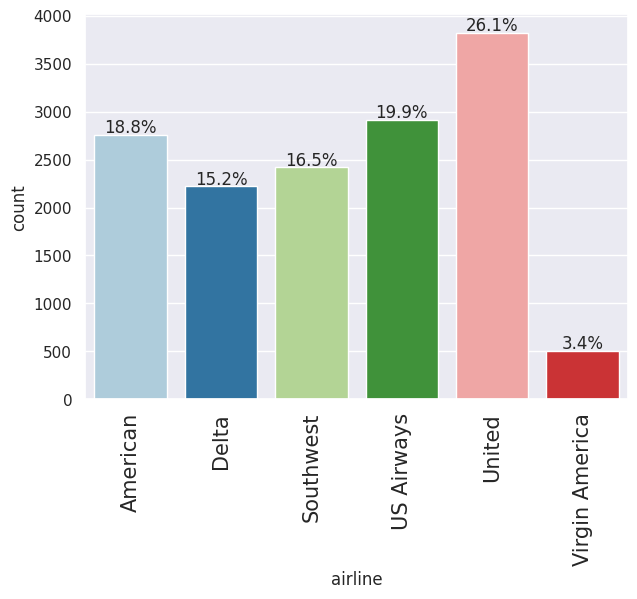

In [ ]:
# part a
labeled_barplot(data, "airline", perc=True)

United is most popular and virgin is least, no further insights here as there may be many reason to tweet or not (good or bad interactions, popularity/ number of sales, etc.)

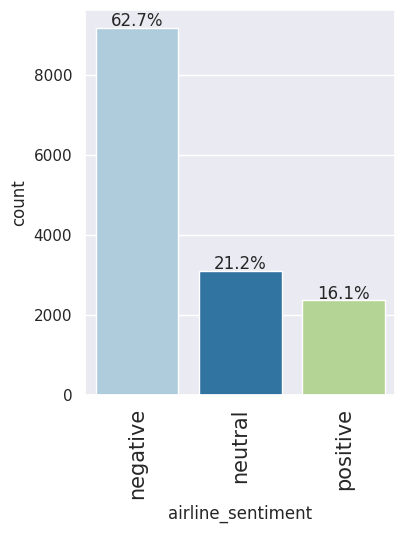

In [ ]:
labeled_barplot(data, "airline_sentiment", perc=True)

Vast majority are negative with very few positive

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


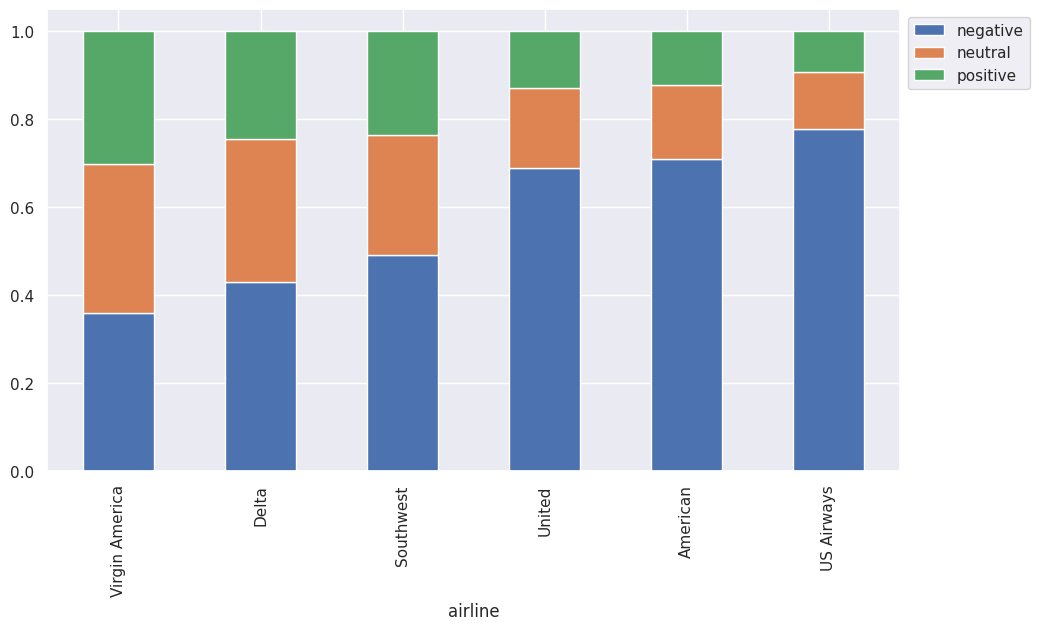

In [ ]:
#b
stacked_barplot(data, "airline","airline_sentiment")

Comparitively, Virigin is the most positively precieved and US the least. Delta and Southwest more positive and United and AMerican less so.

Those that are positively precieved are less tweeted about, this is very interesting

In [ ]:
 # C
from wordcloud import WordCloud,STOPWORDS


In [ ]:
#START WITH NEGATIVE
negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

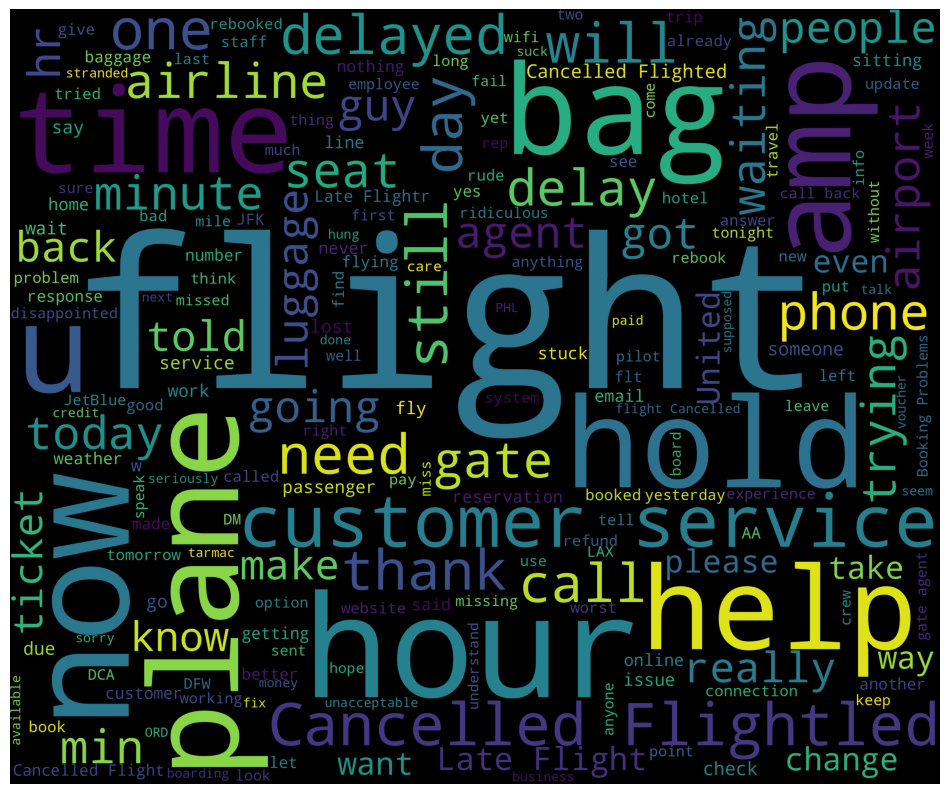

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

A lot of complaints about customer service, call waiting, wait times/delays, and bad flights. Cancellation is also coming up a lot

In [ ]:
#positive
positive_tweets=data[data['airline_sentiment']=='positive']
words2 = ' '.join(positive_tweets['text'])
cleaned_word2 = " ".join([word for word in words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word2)

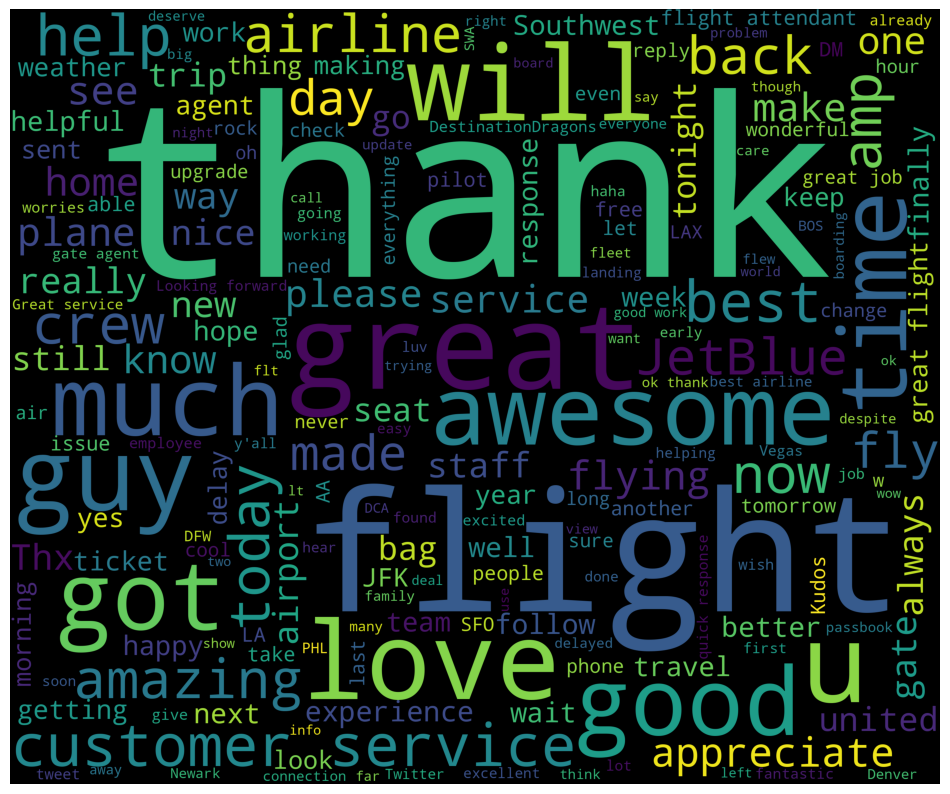

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Lot of positives about the flights themsleves and customer service (like with negative) otherwise there are a lot of general positive words like "good" and sme complements about the crew

In [ ]:
#other tweets
other_tweets=data[data['airline_sentiment']=='neutral']
words3 = ' '.join(other_tweets['text'])
cleaned_word3 = " ".join([word for word in words3.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word3)

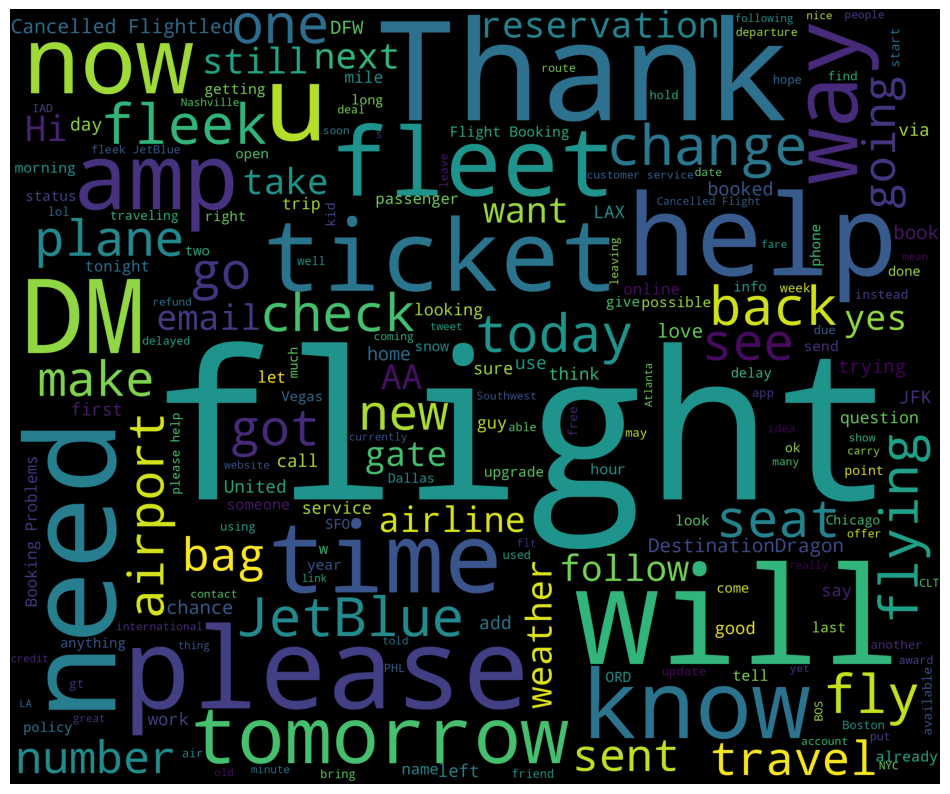

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

Just a lot about the flight and tickets "fleek" is very common. Is this a misspelling of fleet


Understand of data columns: (1.5 Marks) a. Drop all other columns except “text” and “airline_sentiment”. b. Check the shape of the data. c. Print the first 5 rows of data

In [ ]:
data_new=(data['text'], data['airline_sentiment'])
data_new=pd.DataFrame(data_new).T

In [ ]:
data=data_new
data.shape

(14640, 2)

Seems to have worked, check head

In [ ]:
data.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Worked, let's also just see a sample to make sure we have other airlines (more for a double check than anything

In [ ]:
data.sample(10)

,text,airline_sentiment
11090,@USAirways yes. Every one of these on every f...,negative
11114,@USAirways oh the irony. A dog who will not sp...,negative
7466,@JetBlue your agent told us TSA didn't have a ...,negative
10038,@USAirways 4 hrs and counting today alone... l...,negative
12899,@AmericanAir Flight Get Me Out Of Chicago.,neutral
8645,@JetBlue to Increase Charter Service to Cuba -...,neutral
1395,@united If you consider 50 mins for bags @ 10:...,negative
11612,@USAirways @husainhaqqani Mr. Husain u shld pr...,negative
5555,@SouthwestAir just want the money I paid for e...,negative
6490,@SouthwestAir Does anyone ever answer your pho...,negative


Text pre-processing: Data preparation. NOTE:- Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [ ]:
#a html
data['text'] = data['text'].apply(lambda x: strip_html_tags(x))


<ipython-input-24-a76ca08c1d8a>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
#b tokenize
nltk.download('punkt')
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data['text'][0][1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'VirginAmerica'

In [ ]:
#f  lowercase
# I did the next few out of order due to complications
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words
data['text']=data['text'].apply(lambda x: to_lowercase(x))


In [ ]:
#e stop words
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stop_words.remove('not')
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# c remove numbers AND d remove special

num_reviews = data["text"].size
flight_text=data['text']
for i in range( 0,num_reviews ):
  data['text'][i] = re.sub("[^a-zA-Z]", " ", str(flight_text[i]))


In [ ]:
#g lamentize AND h join
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
data['text'] = data['text'].apply(lambda x: lemmatize_text(x))


In [ ]:
#i sample of 5
data.head(5)

,text,airline_sentiment
0,virginamerica dhepburn sa...,neutral
1,virginamerica plus ve add...,positive
2,virginamerica n t today ...,neutral
3,virginamerica s really ag...,negative
4,virginamerica s really bi...,negative


Vectorization
a. Use CountVectorizer. b. Use TfidfVectorizer. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

In [ ]:
#a count
Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features1 = Count_vec.fit_transform(data['text'])

data_features1.shape

(14640, 500)

In [ ]:
#b TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['text'])

data_features2 = data_features.toarray()

data_features2.shape     #feature shape

(14640, 500)

Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Target the final score >= 75% - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)

In [ ]:
# start wih count vec
data_features = data_features1.toarray()

In [ ]:
data_features.shape

(14640, 500)

In [ ]:
X = data_features

y = data['airline_sentiment']

In [ ]:
#creating and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1, stratify=y) #stratify so we don;t over fit for 1

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln: #tuning
    clf = RandomForestClassifier(n_estimators = b, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

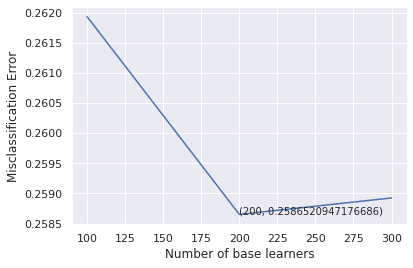

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Error minium at 200

In [ ]:
# Training the best model and calculating accuracy on test data .
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))


              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      2294
     neutral       0.57      0.46      0.51       775
    positive       0.66      0.57      0.61       591

    accuracy                           0.75      3660
   macro avg       0.68      0.64      0.66      3660
weighted avg       0.74      0.75      0.74      3660

Accuracy of the model is :  0.75


Our score are good, especially w/ negative. 75%, as we targete

[[2054  164   76]
 [ 323  353   99]
 [ 149  104  338]]


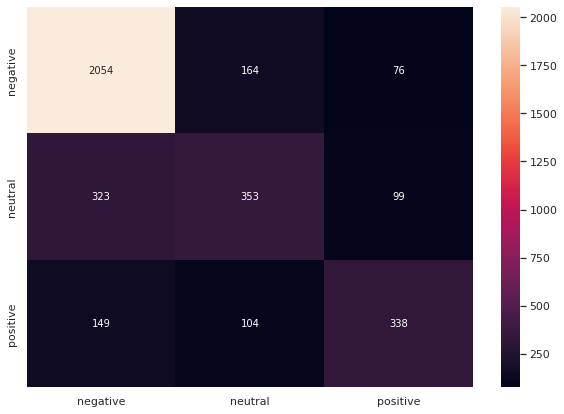

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


Overall we best preidct negative and aren't great at neutral and ok and positive. This may mean negative is the most unique in term of terms used. Many postive seen as negative and same for enutral. I did stratift, perhaps next time I will under sample?

tuning

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
import sklearn.metrics as metrics
parameters = {"n_estimators": [100,200,300],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),

             }
rf_estimator
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = RandomizedSearchCV(rf_estimator, parameters,n_iter=15, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)
clf_tuned = grid_obj.best_estimator_

clf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


RandomForestClassifier(max_features=0.5000000000000001, max_samples=0.3,
                       min_samples_leaf=8, random_state=1)

In [ ]:
# Training the best model and calculating accuracy on test data .
from sklearn.metrics import accuracy_score

clf_tuned.score(X_test, y_test)
count_vectorizer_predicted = clf_tuned.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))


              precision    recall  f1-score   support

    negative       0.75      0.92      0.82      2294
     neutral       0.55      0.29      0.38       775
    positive       0.66      0.49      0.56       591

    accuracy                           0.71      3660
   macro avg       0.65      0.56      0.59      3660
weighted avg       0.69      0.71      0.69      3660

Accuracy of the model is :  0.7147540983606557


Tuning didn't really help... mat have hurt

[[2108  107   79]
 [ 488  221   66]
 [ 232   72  287]]


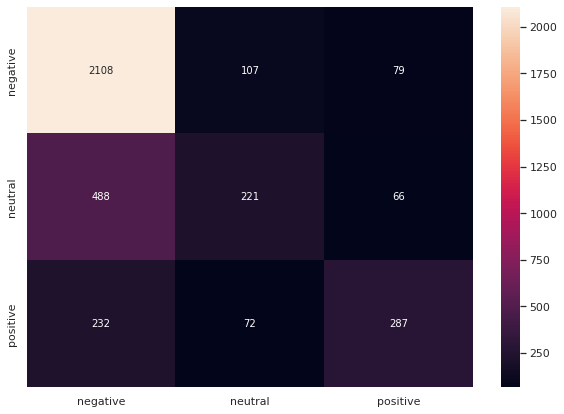

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


Metrics identical or worse so we should just use the old clf

word cloud

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,not,hour,jetblue,great,flight,delay,usairway,united,southwestair,get,love,co,cancel,americanair,good,bag,customer,http,awesome,virginamerica,call,bad,hold,please,time,go,help,ca,would,dm,service,make,airline,fly,need,us,plane,amazing,say,
 
 


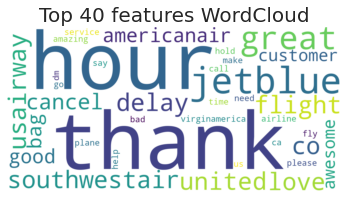

In [ ]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

Lots of thank, hour, and somee mentions of flight and jetblue and airway. Great most common "good" and delay for "bad"/ Some comapny name simportant

In [ ]:
#TfidfVectorizer
data_features = data_features2 # already seems an array?

data_features.shape     #feature shape

(14640, 500)

In [ ]:
X = data_features

y = data['airline_sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1) #stratify so we don;t over fit for 1

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

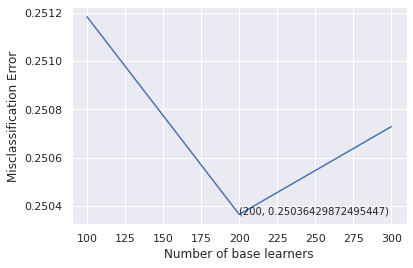

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Erorr cminimizes at 200

In [ ]:
# Training the best model and calculating accuracy on test data .
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = optimal_learners,random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))


              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      2294
     neutral       0.65      0.42      0.51       775
    positive       0.71      0.54      0.62       591

    accuracy                           0.76      3660
   macro avg       0.72      0.63      0.66      3660
weighted avg       0.75      0.76      0.74      3660

Accuracy of the model is :  0.7614754098360655


Accuracy is a little better than untuned and tuned previous at about 76%,

[[2138   91   65]
 [ 384  327   64]
 [ 187   82  322]]


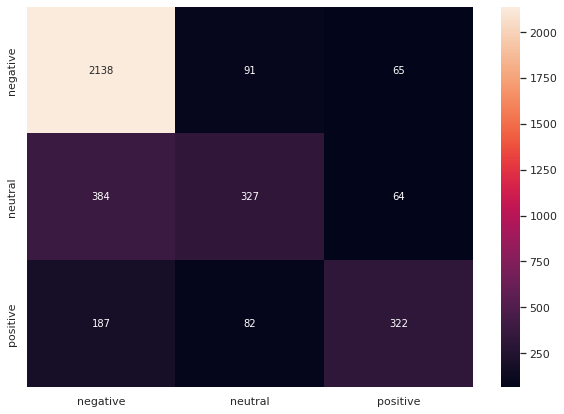

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Overall we best preidct negative and aren't great at neutral and ok and positive. This may mean negative is the most unique in term of terms used. Many postive seen as negative nd more neutral seen as negative than neutral! I did stratift, perhaps next time I will under sample?

Tuning

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
import sklearn.metrics as metrics
parameters = {"n_estimators": [100,200,300],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),

             }
rf_estimator
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = RandomizedSearchCV(rf_estimator, parameters,n_iter=15, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)
clf_tuned = grid_obj.best_estimator_

clf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


RandomForestClassifier(max_features=0.5000000000000001, max_samples=0.3,
                       min_samples_leaf=8, random_state=1)

In [ ]:
# Training the best model and calculating accuracy on test data .
from sklearn.metrics import accuracy_score


clf_tuned.score(X_test, y_test)
count_vectorizer_predicted = clf_tuned.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))


              precision    recall  f1-score   support

    negative       0.75      0.92      0.83      2294
     neutral       0.54      0.33      0.41       775
    positive       0.69      0.45      0.55       591

    accuracy                           0.72      3660
   macro avg       0.66      0.57      0.59      3660
weighted avg       0.70      0.72      0.69      3660

Accuracy of the model is :  0.7174863387978142


Al little worse, keep orignal tuned

[[2106  124   64]
 [ 466  252   57]
 [ 234   89  268]]


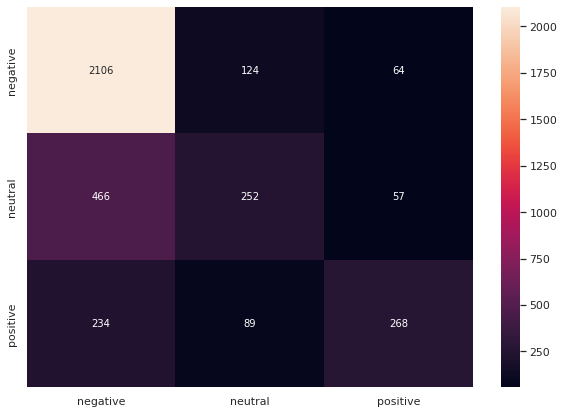

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


word cloud

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,jetblue,southwestair,united,americanair,usairway,flight,not,great,co,hour,http,virginamerica,delay,love,good,get,awesome,cancel,dm,please,customer,bag,call,fly,hold,amazing,service,bad,help,make,time,airline,know,ca,go,appreciate,need,would,follow,
 
 


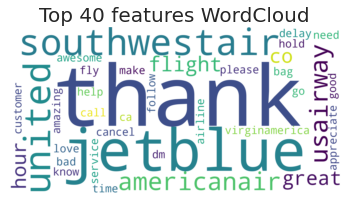

In [ ]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

SOme comapny names important. Thank is important hour and great nay not be as important now, though I do still see them

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.

Most tweets ar enegative and some cmapnies are recieving more negative feedback than others. SOuthwest is more positive than US airwyas for example

A lot of extra information was given and a lot of information is menaninless, some locatiosn ae random words/sentences

Important words for predicting positive or neagtive include comapny names, this
alligns with EDA where we saw virign an dothers were popular and US airways and other not so much

Many tweets, good and bad, deal with customer service. This is logial as both happy anf frustrated customers nay have to deal with them for things like refunds. This may or may not reflect the quality of customer service

More people twee tnegative things, this simply means that people are more vocal when upset and does not mean any company is inherently good or bad

Neutral is hard to detect, perhaps drop it

Remvoing stop words, symbols, and numbers simplifies the twweet. By  lemanizing it, we can reduce hte dimensions. Both these make the model 1) easier for the computer to read and 2) stronger as a result

The tfidf was better at vecotring than count